In [ ]:
from google.colab import drive

# Mount drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

df = pd.read_excel('/content/drive/My Drive/Cone_data_ML.xlsx')
print(df.head())


         Temp      Press  flow rate  molfract        DR        UI
0  900.000214  50.346256  29.999995  0.799993  3.942342  0.999016
1  901.649179  50.001323  29.999990  0.799988  3.922942  0.998706
2  900.001133  50.001814  29.999991  0.743937  3.851164  0.999122
3  900.000711  50.094292  29.507802  0.798951  3.813023  0.999161
4  904.684366  50.000277  29.999907  0.799998  3.886740  0.998141


              Temp       Press   flow rate    molfract          DR          UI
count   766.000000  766.000000  766.000000  766.000000  766.000000  766.000000
mean    980.116262  297.322059   24.615040    0.383814    3.275430    0.996619
std      65.740800  198.153738    6.711586    0.261072    0.609570    0.002232
min     900.000202   50.000003   10.000000    0.100000    1.684048    0.987071
25%     900.028020   52.115835   21.959688    0.100017    2.761958    0.995249
50%     988.918891  300.008231   26.501282    0.400001    3.389904    0.996226
75%    1028.871776  499.999167   29.999917    0.618305    3.911219    0.998717
max    1099.999994  500.000000   30.000000    0.800000    4.027855    1.002436


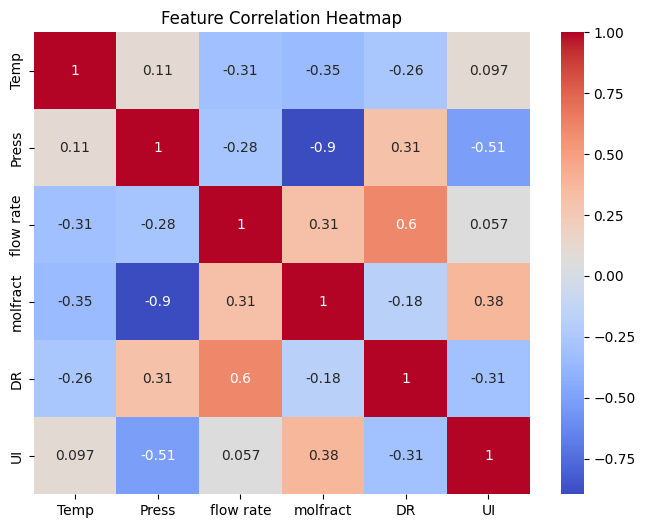

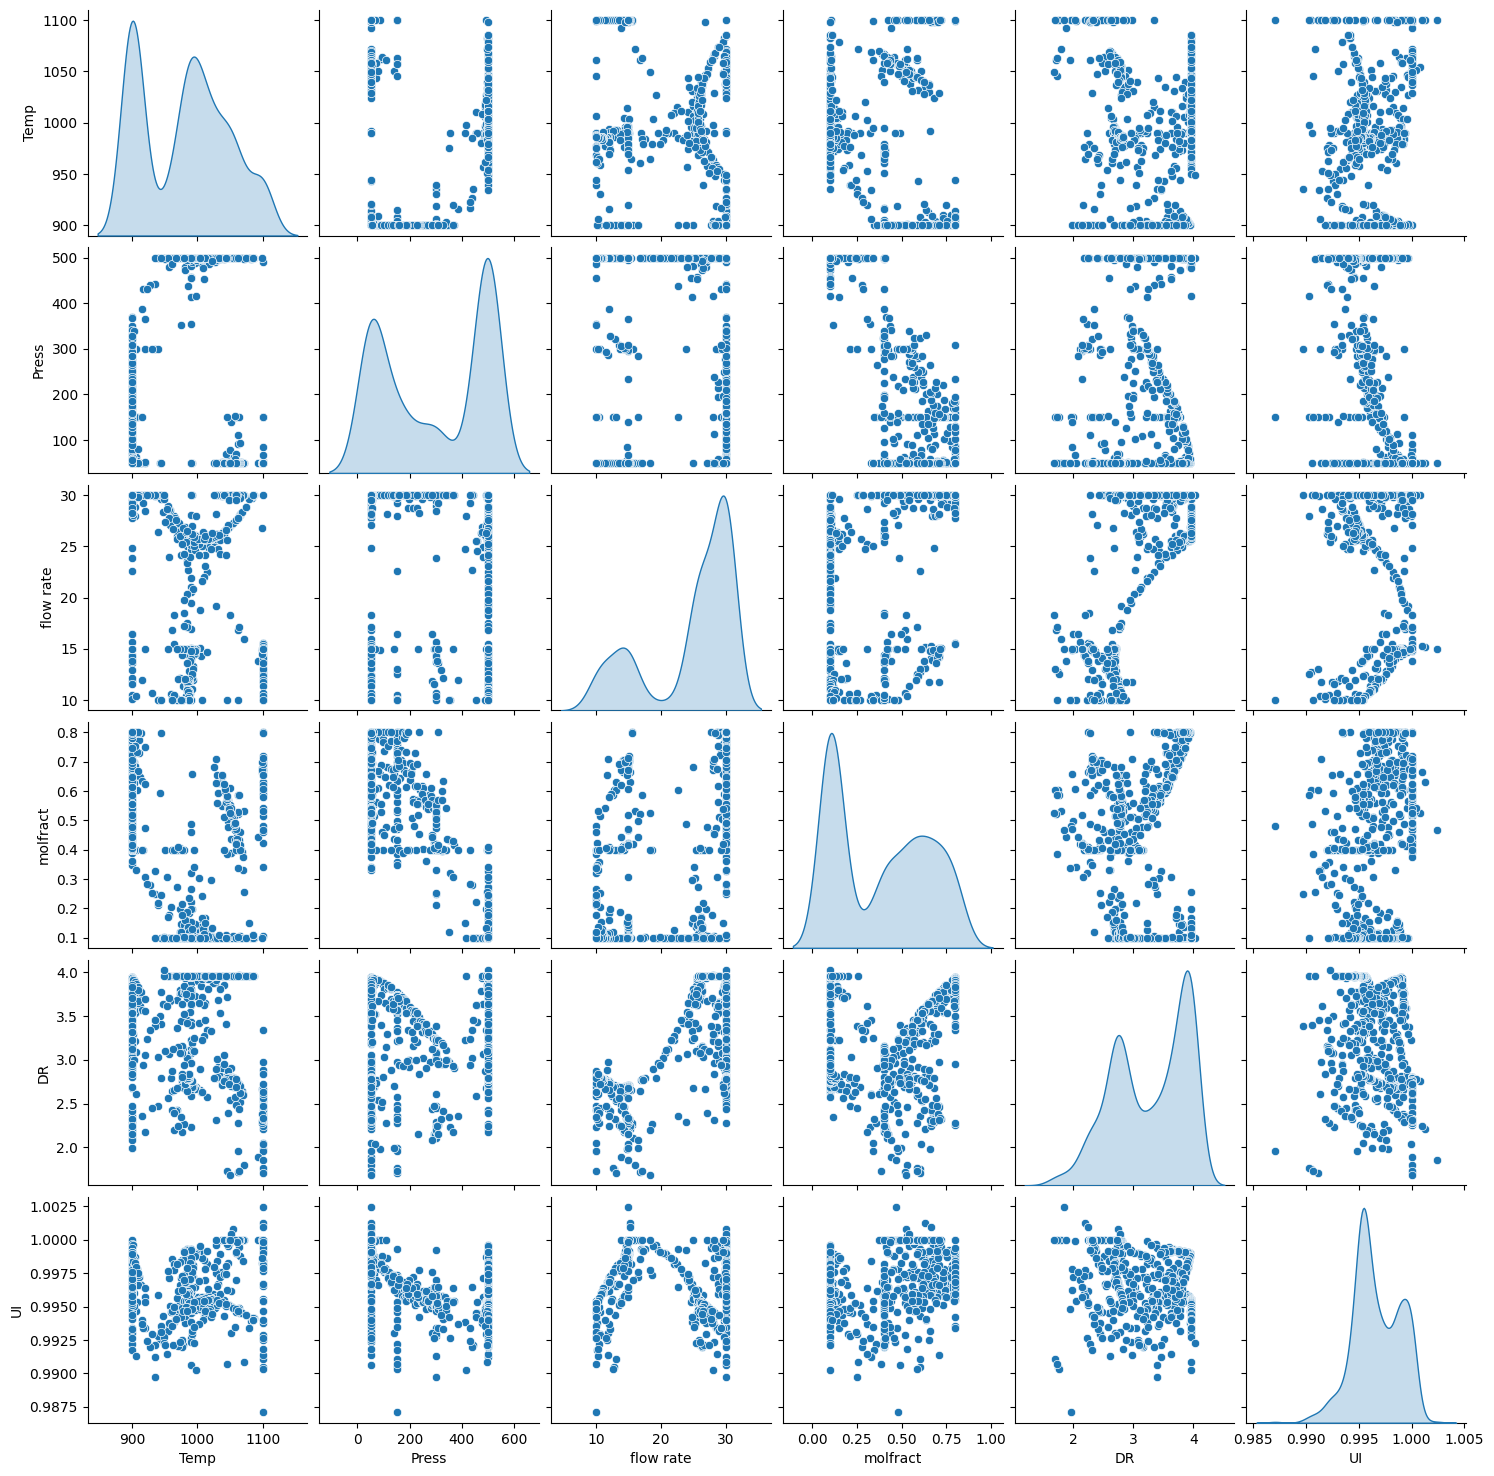

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print(df.describe())

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()

# Pairplot to see relationships
sns.pairplot(df, diag_kind='kde')
plt.show()


In [ ]:
df.tail(20)

,Temp,Press,flow rate,molfract,DR,UI
746,1044.404743,50.000262,29.999729,0.583269,2.790734,1.000000
747,1054.920411,50.000710,29.999054,0.490753,2.789892,1.000000
748,1055.360448,50.002591,29.999998,0.487119,2.787535,1.000000
749,1050.951273,50.000020,29.999946,0.540676,2.779350,1.000441
750,1041.716041,50.000039,29.999972,0.608666,2.771611,1.000000
751,1040.078433,50.000247,29.999981,0.624550,2.755713,1.000000
752,1056.836469,57.382382,29.999978,0.491021,2.732433,1.000000
753,1060.971044,50.000349,29.999993,0.436967,2.741945,0.999858
754,1047.549854,50.000724,29.481706,0.540379,2.726581,1.000000
755,1059.346911,50.000007,29.999930,0.421769,2.775701,0.998981


In [ ]:
!pip install scikit-learn

In [ ]:
import pandas as pd
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np


X = df[['Temp', 'Press', 'flow rate', 'molfract']]
y = df['DR']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Define SVR with RBF kernel
svr = SVR(kernel='rbf')

# Hyperparameter tuning
params = {'C':[0.1,1,10], 'epsilon':[0.01,0.1,0.2], 'gamma':['scale','auto']}
grid = GridSearchCV(svr, params, cv=5, scoring='r2')
grid.fit(X_train, y_train)


best_svr = grid.best_estimator_

y_pred = best_svr.predict(X_test)

print("R2 Score:", r2_score(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))


R2 Score: 0.9941535112539416
RMSE: 0.0472100689391333


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "SVR (Best)": best_svr,
    "XGBoost": XGBRegressor(
        n_estimators=500,
        learning_rate=0.05,
        max_depth=5,
        subsample=0.8,
        colsample_bytree=0.8,
        random_state=42
    )
}

# Train and evaluate all models
results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    pred = model.predict(X_test)
    r2 = r2_score(y_test, pred)
    rmse = np.sqrt(mean_squared_error(y_test, pred))
    results.append((name, r2, rmse))
    # print(f"{name}: R2 = {r2:.4f}, RMSE = {rmse:.4f}")

# Convert results to DataFrame for easy comparison
import pandas as pd
results_df = pd.DataFrame(results, columns=["Model", "R2 Score", "RMSE"])
print("\nModel Performance Comparison:")
print(results_df.sort_values(by="R2 Score", ascending=False))



Model Performance Comparison:
               Model  R2 Score      RMSE
2         SVR (Best)  0.994154  0.047210
3            XGBoost  0.936037  0.156154
1      Random Forest  0.935870  0.156357
0  Linear Regression  0.615581  0.382815


In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(best_svr, X_test, y_test, n_repeats=10, random_state=42)
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': result.importances_mean})
print(importance_df.sort_values(by='Importance', ascending=False))


     Feature  Importance
3   molfract    2.233627
2  flow rate    2.036144
1      Press    1.880994
0       Temp    1.754110


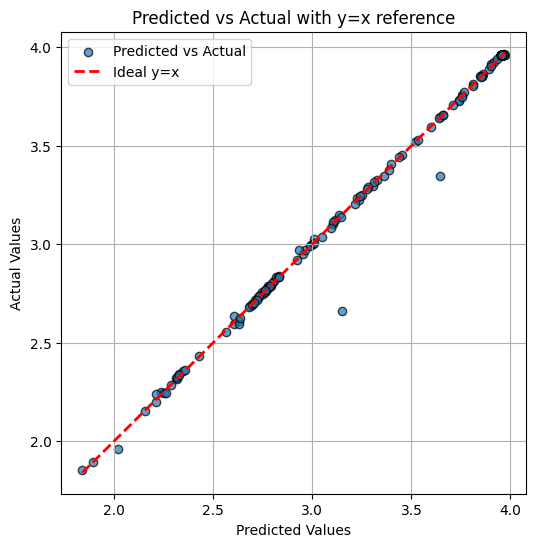

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(6,6))

# Scatter plot
plt.scatter(y_pred, y_test, alpha=0.7, edgecolors='k', label="Predicted vs Actual")

# Draw y = x line
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label="Ideal y=x")

# Labels & legend
plt.xlabel("Predicted Values")
plt.ylabel("Actual Values")
plt.title("Predicted vs Actual with y=x reference")
plt.legend()
plt.grid(True)
plt.show()
